# Statistical Analysis and Hypothesis Testing
## Project : Increasing YoY revenue from game purchases by increasing retention rate of gamers

**About the project:** 
The project involves working on data related to Cookie Cats – a hugely popular puzzle game. As players progress through the levels of the game, they will occasionally encounter gates that force them to wait a non-trivial amount of time or make an in app purchase to progress. In addition to driving in-app purchases, these gates serve the important purpose of giving players an enforced break from playing the game, hopefully resulting in the player&#39;s enjoyment of the game being increased and prolonged. But where should the gates be placed and how the placement of the gates can retain the players for more time.

*The project requires you to:*
1. Perform exploratory data analysis of the given datasets and generate their statistical summary.
2. Perform A/B testing between the two groups of data to analyze the impact on player retention if the first gate in Cookie Cats is moved from level 30 to level 40.

**Objectives/Exercise:**
The overall objective of the project is to test the company’s CEO’s hypothesis that moving the first gate from level 30 to level 40 increases retention rate and the number of game rounds played. The CEO believes that players are churning because the first gate encountered at level 30 is too early which forces players to wait before they can proceed further in the game.

In order to increase player retention rate, developers ran AB-test by moving the first gate from level 30 to level 40 for some players i.e.,
- group A would encounter the gate at level 30, and
- group B would encounter the gate at level 40
To achieve the overall objectives, this work plan can help:
1. Perform initial data preparation.
2. Generate statistical summary and plot charts to answer:
    a. What is the overall 7-day retention rate of the game?
    b. How many players never played the game after installing it?
    c. Does the number of players decrease as the levels become difficult?
3. Generate crosstab for two player groups to understand the difference in the 1- day and 7-days retention rate and total number of game rounds played.
4. Perform two-sample test for groups A and B to test statistical significance amongst the groups in the sum of game rounds played. Here, you can:
    ● Check the assumptions of two sample test:
    ○ i. Normal distribution – Apply Shapiro test
    ○ ii. Homogeneity of variance – Apply
    Levene’s test
        ● Apply the relevant two sample significance test method based on the results from the tests for normality and homogeneity
5. Analyze the significance of the test results and decide which level has more advantage in terms of player retention?
6. Use bootstrap resampling to plot retention rate distribution for both groups to visualize the effect of different versions of the game on retention.

## Packages & Setup

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
user_df = pd.read_csv("K:\KaustavR25\WORK\AINE AI - Intern\Cookie-Cats\cookie_cats.csv")

print("Data types for the data set:")
user_df.dtypes

#dimension of data 
print("Shape of the data i.e. no. of rows and columns")
user_df.shape

#first 5 rows of the data
print("First 5 rows of the raw data:")
user_df.head(5)

Data types for the data set:


userid             int64
version           object
sum_gamerounds     int64
retention_1         bool
retention_7         bool
dtype: object

Shape of the data i.e. no. of rows and columns


(90189, 5)

First 5 rows of the raw data:


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


## Q1. Detect and resolve problems in the data (Missing value, Outliers, etc.)

### Q1.1 Identify missing value

In [3]:
user_df.isnull()

,userid,version,sum_gamerounds,retention_1,retention_7
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
90184,False,False,False,False,False
90185,False,False,False,False,False
90186,False,False,False,False,False
90187,False,False,False,False,False


In [4]:
user_df.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

### Identify outliers

Text(0.5, 1.0, 'Total gamerounds played')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'sum_gamerounds')

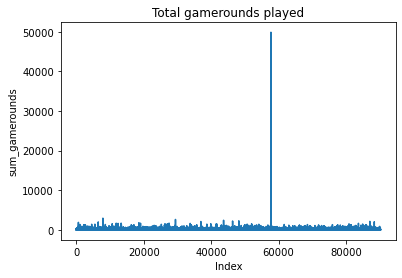

In [5]:
#Check for outlier values in sum_gamerounds column
plt.title("Total gamerounds played")
plt.xlabel("Index")
plt.ylabel("sum_gamerounds")
plt.plot(user_df.sum_gamerounds)

In [6]:
user_df.sum_gamerounds.max()

49854

In [7]:
index = user_df.index
condition = (user_df["sum_gamerounds"] == user_df.sum_gamerounds.max())

outliers = index[condition]

print(outliers)


Int64Index([57702], dtype='int64')


In [9]:
user_df = user_df.drop(index=57702)

In [10]:
user_df

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


Text(0.5, 1.0, 'Total gamerounds played')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'sum_gamerounds')

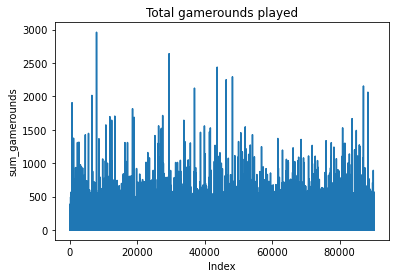

In [11]:
#Check for outlier values in sum_gamerounds column
plt.title("Total gamerounds played")
plt.xlabel("Index")
plt.ylabel("sum_gamerounds")
plt.plot(user_df.sum_gamerounds)

## Q2. Plot summary statistics and identify trends to answer basis business questions

### Q2.1 What is the overall 7-day retention rate of the game?

In [12]:
#Insert calculation for 7-day retention rate

retention_rate_7 = (user_df['retention_7'].mean())*100
print("Overal 7 days retention rate of the game for both versions is: " ,retention_rate_7,"%")


Overal 7 days retention rate of the game for both versions is:  18.60557945624695 %


### Q2.2 How many players never played the game after installing?

In [13]:
sumgameround_zero = len(user_df[user_df.sum_gamerounds == 0].index)
sumgameround_zero

3994

### Q2.3 Does the number of users decrease as the level progresses highlighting the difficulty of the game?

<AxesSubplot:xlabel='sum_gamerounds'>

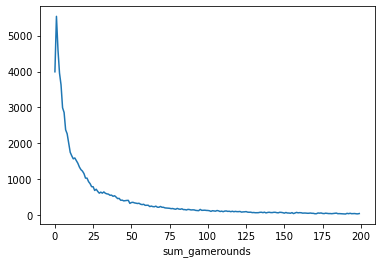

In [14]:
user_df.groupby("sum_gamerounds").userid.count()[:200].plot()

## Q3. Generate crosstab for two groups of players to understand if there is a difference in 7 days retention rate & total number of game rounds played

### Q3.1 Seven days retention rate summary for different game versions

In [15]:
#cross tab for game version and retention_7 flag counting number of users for each possible categories

pd.crosstab(user_df.version, user_df.retention_7).apply(lambda r: r/r.sum(), axis=1)

retention_7,False,True
version,,
gate_30,0.809817,0.190183
gate_40,0.818000,0.182000


**Analysis Result:-**
> Though there is very minimum difference, but the version gate_30 has a higher 7 day retention rate than the gate_40 version

### Q3.2 Gamerounds summary for different game versions

In [16]:
user_df.groupby("version").sum_gamerounds.agg(["count","mean"])

,count,mean
version,,
gate_30,44699,51.342111
gate_40,45489,51.298776


**Analysis Results:-**
> The total number of game_rounds player by each player differs slightly based on the version of games.
> Though the total no. of gamerounds for version gate_40 is more than gate_30 but the average gamerounds played for gate_30 is a bit more than gate_40.

## Q4. Perform two-sample test for groups A and B to test statistical significance amongst the groups in the sum of game rounds played i.e., if groups A and B are statistically different

### Initial data processing

In [19]:
#Define A/B groups for hypothesis testing
user_df["version"] = np.where(user_df.version == "gate_30", "A", "B")
group_A=pd.DataFrame(user_df[user_df.version=="A"]['sum_gamerounds'])
group_B=pd.DataFrame(user_df[user_df.version=="B"]['sum_gamerounds'])

### Q4.1 Shapiro test of Normality

In [20]:
normalityOfA = shapiro(group_A)[1] < 0.05
normalityOfB = shapiro(group_B)[1] < 0.05

In [21]:
normalityOfA

True

In [22]:
normalityOfB

True

**Analysis Results:-**
> We can see that the Shapiro test of Normality for both the groups returned 'True' as result, meaning that,--
>NULL Hypothesis H0: Distribution is normal is False for both the groups
>ALTERNATE Hypothesis H1: Distribution is not normal is True for both teh groups

### Q4.2 Test of homegienity of variance

In [45]:
def levene_Test(dataframe, group, target):
    if (normalityOfA == False) & (normalityOfB == False):

            # Assumption: Homogeneity of variances
        leveneTest = stats.levene(group_A, group_B)[1] < 0.05
            # H0: Homogeneity: False
            # H1: Heterogeneous: True

        if leveneTest == False:
                # Homogeneity
                ttest = stats.ttest_ind(group_A, group_B, equal_var=True)[1]
                # H0: M1 == M2 - False
                # H1: M1 != M2 - True
        else:
                # Heterogeneous
                ttest = stats.ttest_ind(group_A, group_B, equal_var=False)[1]
                # H0: M1 == M2 - False
                # H1: M1 != M2 - True
    else:
            # Non-Parametric Test
        ttest = stats.mannwhitneyu(group_A, group_B)[1] 
            # H0: M1 == M2 - False
            # H1: M1 != M2 - True

        # Result
    temp = pd.DataFrame({
        "AB Hypothesis":[ttest < 0.05], 
        "p-value":[ttest]
    })
    temp["Test Type"] = np.where((normalityOfA == False) & (normalityOfB == False), "Parametric", "Non-Parametric")
    temp["AB Hypothesis"] = np.where(temp["AB Hypothesis"] == False, "Fail to Reject H0", "Reject H0")
    temp["Comment"] = np.where(temp["AB Hypothesis"] == "Fail to Reject H0", "A/B groups are similar!", "A/B groups are not similar!")

        # Columns
    if (normalityOfA == False) & (normalityOfB == False):
        temp["Homogeneity"] = np.where(leveneTest == False, "Yes", "No")
        temp = temp[["Test Type", "Homogeneity","AB Hypothesis", "p-value", "Comment"]]
    else:
        temp = temp[["Test Type","AB Hypothesis", "p-value", "Comment"]]

        # Print Hypothesis
    print("# A/B Testing Hypothesis")
    print("H0: A == B")
    print("H1: A != B", "\n")

    return temp

In [46]:
levene_Test(dataframe=user_df, group = "version", target = "sum_gamerounds")

# A/B Testing Hypothesis
H0: A == B
H1: A != B 



,Test Type,AB Hypothesis,p-value,Comment
0,Non-Parametric,Reject H0,0.025446,A/B groups are not similar!


**Analysis Result:-**
> Therefor, we reject the null hypothesis

### Q4.3 Test of significance: Two sample test

In [51]:
def twosample_Test(dataframe, group, target):
    if (normalityOfA == False) & (normalityOfB == False):

            # Assumption: Homogeneity of variances
        twosampleTest = stests.ztest(group_A, group_B)[1] < 0.05
            # H0: Homogeneity: False
            # H1: Heterogeneous: True

        if twosampleTest == False:
                # Homogeneity
                ttest = stats.ttest_ind(group_A, group_B, equal_var=True)[1]
                # H0: M1 == M2 - False
                # H1: M1 != M2 - True
        else:
                # Heterogeneous
                ttest = stats.ttest_ind(group_A, group_B, equal_var=False)[1]
                # H0: M1 == M2 - False
                # H1: M1 != M2 - True
    else:
            # Non-Parametric Test
        ttest = stats.mannwhitneyu(group_A, group_B)[1] 
            # H0: M1 == M2 - False
            # H1: M1 != M2 - True

        # Result
    temp = pd.DataFrame({
        "AB Hypothesis":[ttest < 0.05], 
        "p-value":[ttest]
    })

In [52]:
temp

,Test Type,AB Hypothesis,p-value,Comment
0,Non-Parametric,Reject H0,0.025446,A/B groups are not similar!


**Analysis Result:-**
> Therefor, we reject the null hypothesis

## Q5. Based on significance testing results, if groups A and B are statistically different, which level has more advantage in terms of player retention and number of game rounds played

In [55]:
# Calculating 1-day and 7-days retention for each A/B group
user_df_retention_ab = user_df.groupby("version").agg({"userid":"count", "retention_1":"mean","retention_7":"mean", "sum_gamerounds":"sum"})
user_df_retention_ab

,userid,retention_1,retention_7,sum_gamerounds
version,,,,
A,44699,0.448198,0.190183,2294941
B,45489,0.442283,0.182000,2333530


**Analysis Result:-**
> We can see the 1-day retention rate for gate_40 version is a tid-bit higher than gate_30, whereas, its opposite for the 7-day retention rate.

> By simply observing this, we can say, that though the 1-day retention for the version with gate at level 40 is higher, but it is not able to retain the user till the 7th day as successfully as th e version with gate at level 30.

**So the company should not change the gate from level 30 to level 40.**

## Q6. [Bonus Question] Using bootstrap resampling, plot the retention rate distribution for both the groups inorder to visualize effect of different version of the game on retention.

<AxesSubplot:ylabel='Density'>

Text(0.5, 0, 'retantion rate')

Text(0, 0.5, 'number of sample')

Text(0.5, 1.0, '1 day retention rate distribution')

<AxesSubplot:ylabel='Density'>

Text(0.5, 0, 'retantion rate')

Text(0.5, 1.0, '7 days retention rate distribution')

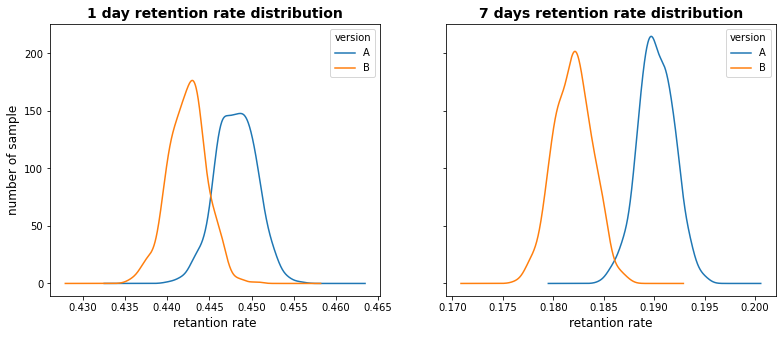

In [54]:
reten_1d = []
reten_7d = []
for i in range(500):
    reten_mean_1 = user_df.sample(frac=1, replace=True).groupby('version')['retention_1'].mean()
    reten_mean_7 = user_df.sample(frac=1, replace=True).groupby('version')['retention_7'].mean()
    reten_1d.append(reten_mean_1)
    reten_7d.append(reten_mean_7)
    
# Transforming the list to a DataFrame
reten_1d = pd.DataFrame(reten_1d)
reten_7d = pd.DataFrame(reten_7d)

# Kernel Density Estimate plot of the bootstrap distributions
fig, (ax1,ax2) = plt.subplots(1, 2, sharey=True, figsize=(13,5))

reten_1d.plot.kde(ax=ax1)
ax1.set_xlabel("retantion rate",size=12)
ax1.set_ylabel("number of sample",size=12)
ax1.set_title("1 day retention rate distribution", fontweight="bold",size=14)

reten_7d.plot.kde(ax=ax2)
ax2.set_xlabel("retantion rate",size=12)
ax2.set_title("7 days retention rate distribution", fontweight="bold",size=14)
plt.show()


**Analysis Result:-**
> The same result as the above table can be observed here in the graph as well.

<AxesSubplot:ylabel='Density'>

<AxesSubplot:ylabel='Density'>

Text(0.5, 0, '% difference')

Text(0, 0.5, '% density')

Text(0.5, 1.0, 'Difference in retention \n between the two A/B groups')

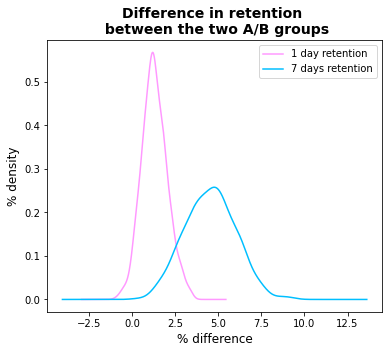

In [57]:
reten_1d['diff'] = ((reten_1d['A'] - reten_1d['B']) / reten_1d['B'] * 100)
reten_7d['diff'] = ((reten_7d['A'] - reten_7d['B']) / reten_7d['B'] * 100)

# Ploting the bootstrap % difference
fig, (ax1) = plt.subplots(1, 1,figsize=(6,5))

reten_1d['diff'].plot.kde(ax=ax1, c="#ff99ff", label = "1 day retention")
reten_7d['diff'].plot.kde(ax=ax1, c= "#00bfff", label = "7 days retention")
ax1.set_xlabel("% difference",size=12)
ax1.set_ylabel("% density",size=12)
ax1.set_title("Difference in retention \n between the two A/B groups", fontweight="bold", size=14)
plt.legend()
plt.show()

From these chart, we can see that the most likely % difference is around 1% - 2% for 1-day retention. For 7-days retention the most likely % difference is around 2% - 5%. Moreover, the most of the distribution is above 0%, in favor of a gate at level 30.

In [59]:
#the probability that 1-day retention is greater when the gate is at level 30
prob_1 = (reten_1d['diff']>0).sum()/len(reten_1d['diff'])

#the probability that 7-days retention is greater when the gate is at level 30
prob_7 = (reten_7d['diff']>0).sum()/len(reten_7d['diff'])

# Pretty printing the probability
print(f"The probability that 1-day retention is greater when the gate is at level 30: {(prob_1)*100}% \
      \nThe probability that 7-days retention is greater when the gate is at level 30: {(prob_7)*100}% ")

The probability that 1-day retention is greater when the gate is at level 30: 97.2%       
The probability that 7-days retention is greater when the gate is at level 30: 100.0% 


## Conclusion

The bootstrap result tells us that there is strong evidence 100% probability that 7-day retention is higher when the gate is at level 30 than when it is at level 40.

The conclusion is: If we want to keep retention high — both 1-day and 7-day retention — we should not move the gate from level 30 to level 40. There are, of course, other metrics we could look at, like the number of game rounds played or how much in-game purchases are made by the two AB-groups. But retention is one of the most important metrics.